In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
bike_rentals = pd.read_csv("C:/Users/George varghese/Desktop/Analytics/hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

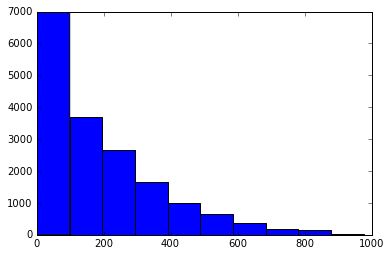

In [6]:
plt.hist(bike_rentals["cnt"])

In [7]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [8]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

Prepare an Ensemble model

Error metric:
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [11]:
import math
bike_rentals = bike_rentals.reindex(np.random.permutation(bike_rentals.index))
train_maxrow = math.floor(bike_rentals.shape[0] * 0.8)
train = bike_rentals.iloc[:train_maxrow,:]
test = bike_rentals.iloc[train_maxrow:, :]

First: Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

predictors = bike_rentals.columns.tolist()
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

linreg = LinearRegression()
linreg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
predictions = linreg.predict(test[predictors])

error = np.mean((predictions - test["cnt"]) ** 2)
error

18286.016442166903

Error:
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

Second: Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

decreg = DecisionTreeRegressor(min_samples_leaf=5)
decreg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [24]:
predictions2 = decreg.predict(test[predictors])
error2 = np.mean((predictions2 - test["cnt"]) ** 2)
error

18286.016442166903

Third: Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

ranreg = RandomForestRegressor(min_samples_leaf=5)
ranreg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [26]:
predictions3 = ranreg.predict(test[predictors])
np.mean((predictions - test["cnt"]) ** 2)

2377.111225391802

Random forest error:
By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.